In [1]:
# import our packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## **1. Download and Explore our Data**

In [2]:
!gdown --id 1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip
!unzip -q test1.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:15<00:00, 55.6MB/s]


In [ ]:
# Define our images sizes
IMAGE_WIDTH = 60
IMAGE_HEIGHT = 60
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

### **Loading our data and it's labels into a dataframe**

There are many ways we can do this, this way is relatively simple to follow.

`dog.1034234.jpg`

In [3]:
filenames = os.listdir("./train")

categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'class': categories
})
df.head()

,filename,class
0,dog.708.jpg,1
1,dog.10712.jpg,1
2,cat.3973.jpg,0
3,cat.3285.jpg,0
4,cat.1394.jpg,0


#### **View a sample image**

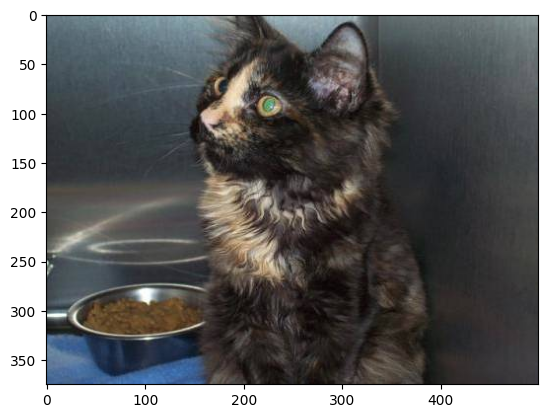

In [ ]:
sample = random.choice(filenames)
image = load_img("./train/" + sample)
plt.imshow(image)

## **2. Create our Model**

In [ ]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 29, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0

## **3. Create our Data Generators**

In [ ]:
df["class"] = df["class"].replace({0: 'cat', 1: 'dog'})
df.head()

,filename,class
0,dog.708.jpg,dog
1,dog.10712.jpg,dog
2,cat.3973.jpg,cat
3,cat.3285.jpg,cat
4,cat.1394.jpg,cat


#### **Split our dataset using train_test_split**

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=7)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

### **Create our Training Data Generator**

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "./train/",
    x_col = 'filename',
    y_col = 'class',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


### **Create our Validation Data Generator**

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "./train/",
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


#### **Creating an example Data Generator to load just a single image**

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "./train/",
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


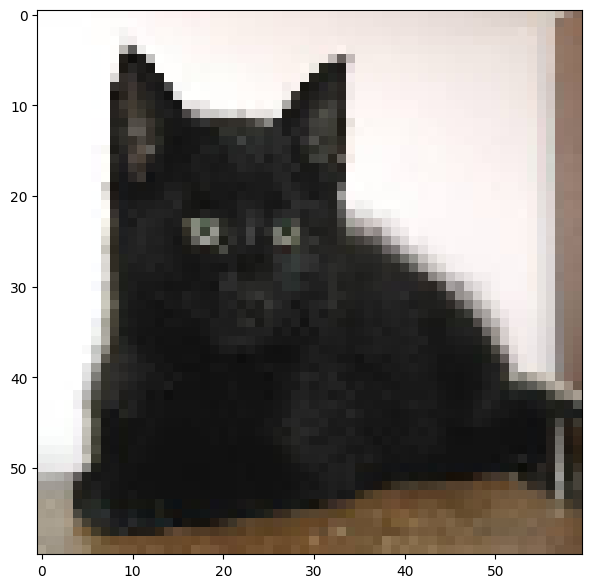

In [ ]:
plt.figure(figsize=(6, 6))

for X_batch, Y_batch in example_generator:
    image = X_batch[0]
    plt.imshow(image)
    break

plt.tight_layout()
plt.show()

## **4. Start Training Our Model**

In [ ]:
epochs = 10

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
)

Epoch 1/10
625/625 [==============================] - 48s 60ms/step - loss: 0.6218 - accuracy: 0.6386 - val_loss: 0.5454 - val_accuracy: 0.7240
Epoch 2/10
625/625 [==============================] - 37s 59ms/step - loss: 0.5081 - accuracy: 0.7517 - val_loss: 0.4780 - val_accuracy: 0.7648
Epoch 3/10
625/625 [==============================] - 40s 64ms/step - loss: 0.4495 - accuracy: 0.7886 - val_loss: 0.4555 - val_accuracy: 0.7834
Epoch 4/10
625/625 [==============================] - 42s 67ms/step - loss: 0.4013 - accuracy: 0.8160 - val_loss: 0.4335 - val_accuracy: 0.7960
Epoch 5/10
625/625 [==============================] - 37s 59ms/step - loss: 0.3570 - accuracy: 0.8401 - val_loss: 0.4147 - val_accuracy: 0.8108
Epoch 6/10
625/625 [==============================] - 37s 59ms/step - loss: 0.3089 - accuracy: 0.8672 - val_loss: 0.4329 - val_accuracy: 0.8086
Epoch 7/10
625/625 [==============================] - 40s 64ms/step - loss: 0.2622 - accuracy: 0.8898 - val_loss: 0.4459 - val_accuracy:

# **5. Using callbacks**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
checkpoint = ModelCheckpoint("cat_vs_dog_Checkpoint.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 5, #Number of epochs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

In [ ]:
# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
epochs = 10

history = model.fit(
    train_generator,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator)

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.0885 - accuracy: 0.9669
Epoch 1: val_loss improved from inf to 0.65731, saving model to MNIST_Checkpoint.h5
625/625 [==============================] - 39s 63ms/step - loss: 0.0885 - accuracy: 0.9669 - val_loss: 0.6573 - val_accuracy: 0.8066 - lr: 5.0000e-04
Epoch 2/10
  1/625 [..............................] - ETA: 1:00 - loss: 0.0577 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - ETA: 0s - loss: 0.0661 - accuracy: 0.9761
Epoch 2: val_loss did not improve from 0.65731
625/625 [==============================] - 37s 59ms/step - loss: 0.0661 - accuracy: 0.9761 - val_loss: 0.7875 - val_accuracy: 0.8010 - lr: 5.0000e-04
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.9817
Epoch 3: val_loss did not improve from 0.65731
625/625 [==============================] - 37s 59ms/step - loss: 0.0500 - accuracy: 0.9817 - val_loss: 0.8811 - val_accuracy: 0.7990 - lr: 5.0000e-04
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.9794
Epoch 4: val_loss did not improve from 0.65731

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
625/625 [==============================] - 37s 59ms/step - loss: 0.0578 - accuracy: 0.9794 - val_loss: 0.7978 - val_accuracy: 0.7854 - lr: 5.0000e-04
Epoch 5/10
625/625 [==============================] - 